In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns; sns.set()

df = pd.read_excel('taniguchi_2017_leg.xlsx',encoding='cp932')

questions = ['Q4_{}'.format(i) for i in np.arange(1,18)]

for i in questions:
    df[i].replace(99,np.nan,inplace=True)


df.loc[:,questions] = KNNImputer().fit_transform(df[questions])

df.head()

,ID,NAME,HABATSU,RESPONSE,PREFEC,DISTRICT,PR,PRBLOCK,PARTY,MINSHIN,...,Q9_6,Q9_7,Q9_8,Q9_9,Q1_1_FA,Q1_2_FA,Q1_3_FA,SQ7_1_1_FA,SQ7_1_2_FA,SQ7_1_3_FA
0,1,船橋＝利実,麻生派,1,1,1,0,51,1,66,...,1,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,道下＝大樹,NaN,1,1,1,0,51,8,2,...,5,5,5,5,経済・雇用,NaN,NaN,NaN,NaN,NaN
2,3,吉川＝貴盛,二階派,1,1,2,0,51,1,66,...,1,1,2,2,NaN,NaN,NaN,NaN,教育の充実,NaN
3,4,金倉＝昌俊,NaN,1,1,2,0,51,3,66,...,5,5,5,5,NaN,NaN,消費税10%中止,NaN,NaN,NaN
4,5,小和田＝康文,NaN,1,1,2,0,51,4,66,...,3,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN


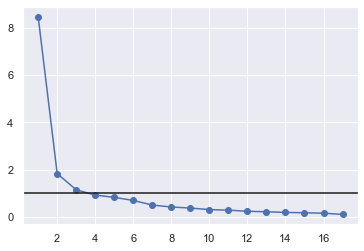

In [30]:
from factor_analyzer import FactorAnalyzer as fa

mod = fa(rotation=None).fit(df[questions])

plt.plot(np.arange(1,18,1),mod.get_eigenvalues()[0],marker='o')
plt.axhline(1,color='k')

In [32]:
res = fa(rotation='promax',n_factors=2).fit(df[questions])

for i in np.arange(1,res.n_factors+1):
    df['factor{}'.format(i)] = res.transform(df[questions].fillna(3))[:,i-1]

df[['factor{}'.format(i) for i in np.arange(1,res.n_factors+1)]].corr()

,factor1,factor2
factor1,1.000000,0.340362
factor2,0.340362,1.000000


Text(0.5, 1.0, 'Japanese 2017 general election candidates by political party and ideological position')

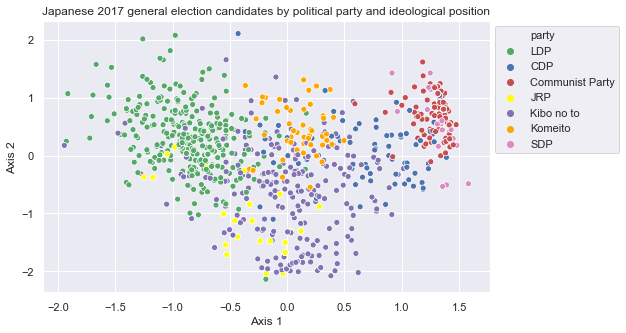

In [33]:
df['party'] = df['PARTY'].replace(np.arange(1,12),['LDP','Komeito','Communist Party','JRP','SDP',np.nan,'Kibo no to','CDP',np.nan,np.nan,np.nan])
plt.figure(figsize=(8,5))
sns.scatterplot(x='factor1',y='factor2',hue='party',data=df,palette=['C2','C0','C3','yellow','C4','orange','C6'])
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Japanese 2017 general election candidates by political party and ideological position')

In [34]:
table = pd.pivot_table(df,index='HABATSU',values=['factor{}'.format(i) for i in np.arange(1,res.n_factors+1)])

df['habatsu'] = df['HABATSU'].replace(['無派閥','竹下派','岸田派','谷垣グループ','石破派','麻生派','二階派','菅グループ','石原派','細田派'],['mu','takeshita','kishida','tanigaki','ishiba','aso','nikai','suga','ishihara','hosoda'])

table.sort_values('factor1')

,factor1,factor2
HABATSU,,
細田派,-0.927243,0.256009
菅グループ,-0.924160,0.301007
石原派,-0.873666,0.237748
麻生派,-0.812510,0.279352
岸田派,-0.794241,0.355359
二階派,-0.790095,0.314665
谷垣グループ,-0.744386,0.403357
石破派,-0.739040,0.190296
無派閥,-0.717044,0.106415
